In [1]:
#Importing Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SMOTE to balance the Imbalance Data
!pip install imblearn
from imblearn.over_sampling import SMOTE

#for Spliting Data and Hyperparameter Tuning 
from sklearn.model_selection import train_test_split, GridSearchCV

#Importing Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
!pip install catboost
from catboost import CatBoostClassifier
    
#Bagging Algo
!pip install lightgbm
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.neural_network import MLPClassifier

#To tranform data
from sklearn import preprocessing

#statistical Tools
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

#Setting Format
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
test.shape,train.shape

((112392, 40), (233154, 41))

<AxesSubplot:>

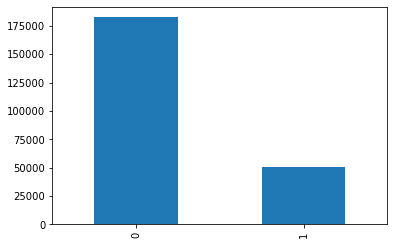

In [4]:
train.loan_default.value_counts().plot(kind='bar')

In [5]:
#Lets looks at data description
info = pd.read_csv("data_dictionary.csv")
info

,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN
5,5,branch_id,Branch where the loan was disbursed,NaN
6,6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,8,Current_pincode,Current pincode of the customer,NaN
9,9,Date.of.Birth,Date of birth of the customer,NaN


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.00000,535917.57338,68315.69371,417428.00000,476786.25000,535978.50000,595039.75000,671084.00000
disbursed_amount,233154.00000,54356.99353,12971.31417,13320.00000,47145.00000,53803.00000,60413.00000,990572.00000
asset_cost,233154.00000,75865.06814,18944.78129,37000.00000,65717.00000,70946.00000,79201.75000,1628992.00000
ltv,233154.00000,74.74653,11.45664,10.03000,68.88000,76.80000,83.67000,95.00000
branch_id,233154.00000,72.93609,69.83499,1.00000,14.00000,61.00000,130.00000,261.00000
supplier_id,233154.00000,19638.63504,3491.94957,10524.00000,16535.00000,20333.00000,23000.00000,24803.00000
manufacturer_id,233154.00000,69.02805,22.14130,45.00000,48.00000,86.00000,86.00000,156.00000
Current_pincode_ID,233154.00000,3396.88025,2238.14750,1.00000,1511.00000,2970.00000,5677.00000,7345.00000
State_ID,233154.00000,7.26224,4.48223,1.00000,4.00000,6.00000,10.00000,22.00000
Employee_code_ID,233154.00000,1549.47715,975.26128,1.00000,713.00000,1451.00000,2362.00000,3795.00000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [8]:
#Replacing all the Spaces with '_'
train.columns = train.columns.str.replace('.','_')

In [9]:
train.isna().sum()

#So only Employment Type data is missing

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

<AxesSubplot:>

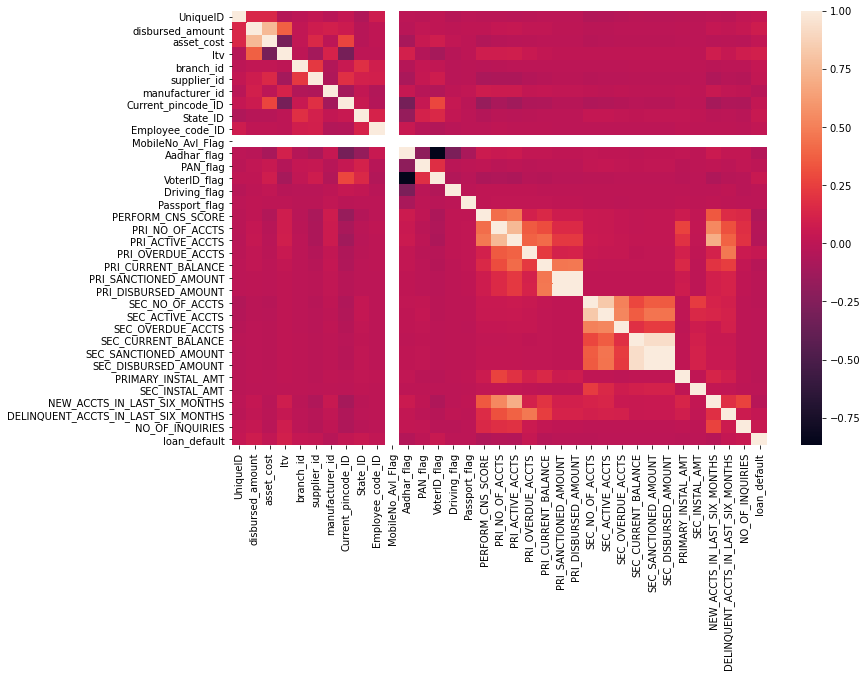

In [10]:
#Data Correlation
plt.figure(figsize=(12,8))
sns.heatmap(train.corr())

# Digging Few Columns for Insight

In [11]:
#Lets Look at few columns

columns_unique = ['UniqueID','MobileNo_Avl_Flag',
         'Current_pincode_ID','Employee_code_ID',
         'NO_OF_INQUIRIES','State_ID',
         'branch_id','manufacturer_id','supplier_id']


unique_col = train[columns_unique]

In [12]:
unique_col.head()

,UniqueID,MobileNo_Avl_Flag,Current_pincode_ID,Employee_code_ID,NO_OF_INQUIRIES,State_ID,branch_id,manufacturer_id,supplier_id
0,420825,1,1441,1998,0,6,67,45,22807
1,537409,1,1502,1998,0,6,67,45,22807
2,417566,1,1497,1998,0,6,67,45,22807
3,624493,1,1501,1998,1,6,67,45,22807
4,539055,1,1495,1998,1,6,67,45,22807


In [13]:
#Looking at all unique values
for i in unique_col.columns:
    print(i," : distinct_value")
    print(unique_col[i].nunique()," : No. of unique Items")
    #print(unique_col[i].unique())
    print("-"*30)
    print("")

UniqueID  : distinct_value
233154  : No. of unique Items
------------------------------

MobileNo_Avl_Flag  : distinct_value
1  : No. of unique Items
------------------------------

Current_pincode_ID  : distinct_value
6698  : No. of unique Items
------------------------------

Employee_code_ID  : distinct_value
3270  : No. of unique Items
------------------------------

NO_OF_INQUIRIES  : distinct_value
25  : No. of unique Items
------------------------------

State_ID  : distinct_value
22  : No. of unique Items
------------------------------

branch_id  : distinct_value
82  : No. of unique Items
------------------------------

manufacturer_id  : distinct_value
11  : No. of unique Items
------------------------------

supplier_id  : distinct_value
2953  : No. of unique Items
------------------------------



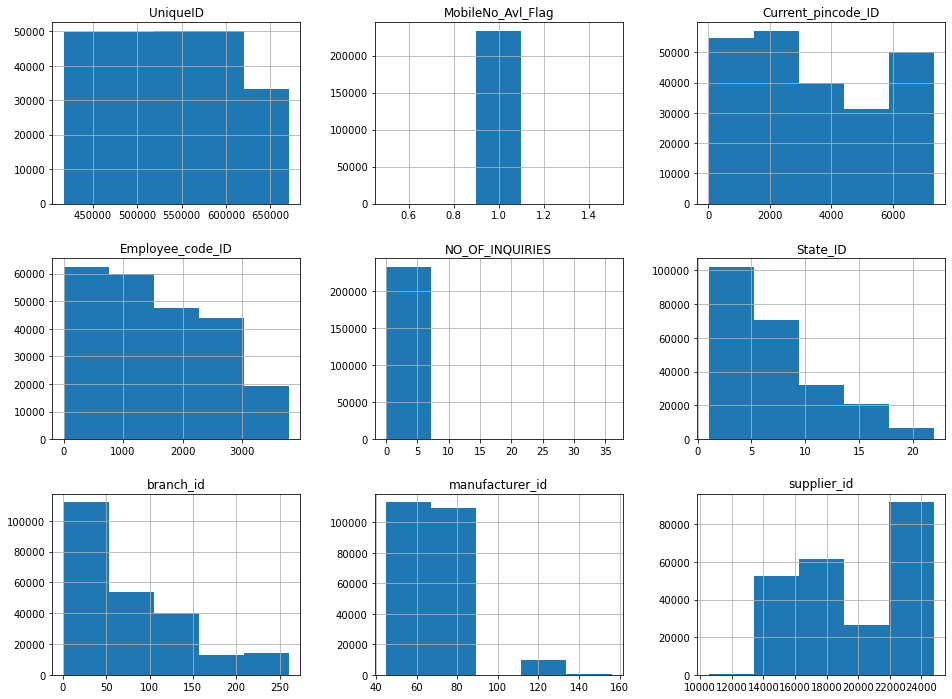

In [14]:
unique_col.hist(bins=5, figsize=(16,12))
plt.show()

UniqueID = It is provided to every customer so its Unique and will always be different

MobileNo_Avl_Flag = Whether person provided Mobile No. Doesn't tell us if loan will default

Current_pincode_ID = It is Customers address we don't need that for Prediction

Employee_code_ID = Employee ID is not required as it doesn't related with Loan_defualt

NO_OF_INQUIRIES = No. of Inquiries to loan doesn't help us to determine wheather loan will default or not

State_ID = It is where loan is availed and doesn't add much to prediction to loan default

branch_id = Branch ID isn't relevent to Data Processing

manufacturer_id = Manufacturer ID doesn't add much too data

supplier_id = Supplier ID doesn't add much too data


In [15]:
def columns_drop(data):
    data.drop(unique_col,axis=1,inplace=True)

In [16]:
columns_drop(train)

In [17]:
#Now we have 2 Columns named "AVERAGE_ACCT_AGE" & "CREDIT_HISTORY_LENGTH".
#They have AplhNumeric Values Lets change them to Months

def change_col_month(col):
    year = int(col.split()[0].replace('yrs',''))
    month = int(col.split()[1].replace('mon',''))
    return year*12+month

def months_transformation(data):
    data['CREDIT_HISTORY_LENGTH'] = data['CREDIT_HISTORY_LENGTH'].apply(change_col_month)
    data['AVERAGE_ACCT_AGE'] = data['AVERAGE_ACCT_AGE'].apply(change_col_month)

In [18]:
months_transformation(train)

In [19]:
train.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default
0,50578,58400,89.55000,01-01-84,Salaried,03-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23000,31-07-85,Self employed,26-09-18,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,1
2,53278,61360,89.63000,24-08-85,Self employed,01-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48000,30-12-93,Self employed,26-10-18,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1
4,52378,60300,88.39000,09-12-77,Self employed,26-09-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='AVERAGE_ACCT_AGE', ylabel='loan_default'>

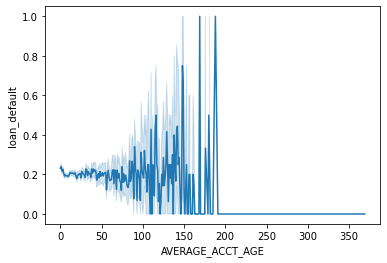

In [20]:
#plot = data.iloc[:test.shape[0]]
plot = train[train['AVERAGE_ACCT_AGE']<175]
sns.lineplot(x=train['AVERAGE_ACCT_AGE'],y=train['loan_default'])

<AxesSubplot:xlabel='CREDIT_HISTORY_LENGTH', ylabel='loan_default'>

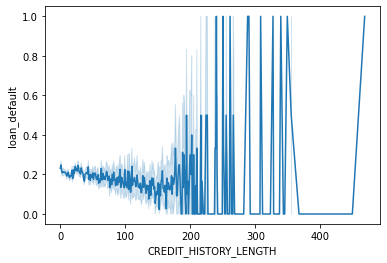

In [21]:
#plot = data.iloc[:test.shape[0]]
plot = train[train['CREDIT_HISTORY_LENGTH']<200]
sns.lineplot(x=train['CREDIT_HISTORY_LENGTH'],y=train['loan_default'])

# Transform CNS Score And Create New Columns

Now lets look at CNS Score Description




In [22]:
train.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [23]:
def replace_not_scored(n):
    #here we are spliting letters before '-'.
    score=n.split("-")
    
    if len(score)!=1:
        return score[0]
    else:
        return 'N'

def transform_CNS_Description(data):
    data['CNS_SCORE_DESCRIPTION']=data['PERFORM_CNS_SCORE_DESCRIPTION'].apply(replace_not_scored).astype(np.object)
    
    #Now Transform CNS Score Description data into Numbers

    sub_risk = {'N':-1, 'K':0, 'J':1, 'I':2, 'H':3, 'G':4, 'E':5,'F':6, 'L':7, 'M':8, 'B':9, 'D':10, 'A':11, 'C':12}

    data['CNS_SCORE_DESCRIPTION'] = data['CNS_SCORE_DESCRIPTION'].apply(lambda x: sub_risk[x])
    
transform_CNS_Description(train)

In [24]:
train.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default,CNS_SCORE_DESCRIPTION
0,50578,58400,89.55000,01-01-84,Salaried,03-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
1,47145,65550,73.23000,31-07-85,Self employed,26-09-18,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,1,2
2,53278,61360,89.63000,24-08-85,Self employed,01-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
3,57513,66113,88.48000,30-12-93,Self employed,26-10-18,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,7
4,52378,60300,88.39000,09-12-77,Self employed,26-09-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1


In [25]:
def transform_PERFORM_CNS_SCORE_DESCRIPTION(data):
    #Replacing all the values into Common Group

    data['PERFORM_CNS_SCORE_DESCRIPTION'].replace({'C-Very Low Risk':'Very Low Risk',
                                                 'A-Very Low Risk':'Very Low Risk',
                                                 'D-Very Low Risk':'Very Low Risk',
                                                 'B-Very Low Risk':'Very Low Risk',
                                                 'M-Very High Risk':'Very High Risk',
                                                 'L-Very High Risk':'Very High Risk',
                                                 'F-Low Risk':'Low Risk',
                                                 'E-Low Risk':'Low Risk',
                                                 'G-Low Risk':'Low Risk',
                                                 'H-Medium Risk':'Medium Risk',
                                                 'I-Medium Risk':'Medium Risk',
                                                 'J-High Risk':'High Risk',
                                                 'K-High Risk':'High Risk'},
                                                  inplace=True)

    #Transformin them into Numeric Features

    risk_map = {'No Bureau History Available':-1, 
                  'Not Scored: No Activity seen on the customer (Inactive)':-1,
                  'Not Scored: Sufficient History Not Available':-1,
                  'Not Scored: No Updates available in last 36 months':-1,
                  'Not Scored: Only a Guarantor':-1,
                  'Not Scored: More than 50 active Accounts found':-1,
                  'Not Scored: Not Enough Info available on the customer':-1,
                  'Very Low Risk':4,
                  'Low Risk':3,
                  'Medium Risk':2, 
                  'High Risk':1,
                  'Very High Risk':0}

    data['PERFORM_CNS_SCORE_DESCRIPTION'] = data['PERFORM_CNS_SCORE_DESCRIPTION'].map(risk_map)

transform_PERFORM_CNS_SCORE_DESCRIPTION(train)

In [26]:
train.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default,CNS_SCORE_DESCRIPTION
0,50578,58400,89.55000,01-01-84,Salaried,03-08-18,1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
1,47145,65550,73.23000,31-07-85,Self employed,26-09-18,1,0,0,0,0,598,2,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,1,2
2,53278,61360,89.63000,24-08-85,Self employed,01-08-18,1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
3,57513,66113,88.48000,30-12-93,Self employed,26-10-18,1,0,0,0,0,305,0,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,7
4,52378,60300,88.39000,09-12-77,Self employed,26-09-18,1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1


<AxesSubplot:xlabel='PERFORM_CNS_SCORE_DESCRIPTION', ylabel='count'>

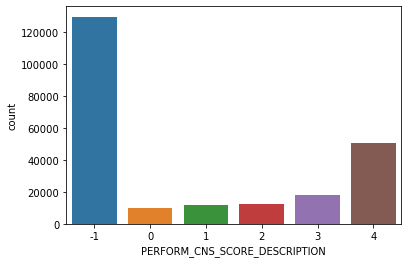

In [27]:
sns.countplot(x = train['PERFORM_CNS_SCORE_DESCRIPTION'])

# Treating Missing Values

In [28]:
train.Employment_Type.value_counts()

Self employed    127635
Salaried          97858
Name: Employment_Type, dtype: int64

In [29]:
defa = pd.crosstab(train['Employment_Type'], train['loan_default'])
print(defa)

loan_default         0      1
Employment_Type              
Salaried         77948  19910
Self employed    98578  29057


In [30]:
def fill_employment_type(data):
    data['Employment_Type'] = data['Employment_Type'].fillna('Salaried')
    employment_map = {'Self employed':0, 'Salaried':1, 'Not_employed':-1}

    data['Employment_Type'] = data['Employment_Type'].apply(lambda x: employment_map[x])
fill_employment_type(train)

In [31]:
import scipy.stats as stats
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(defa)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)

Chi Square Statistics 190.6579236758318
p-value 2.2841351170641894e-43
Degree of freedom 1


<AxesSubplot:xlabel='Employment_Type', ylabel='count'>

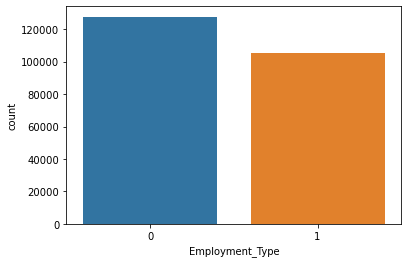

In [32]:
sns.countplot(x = train['Employment_Type'])

# Transforming Primary and Secondary Accounts

In [33]:
pri_columns = ['PRI_NO_OF_ACCTS','SEC_NO_OF_ACCTS',
           'PRI_ACTIVE_ACCTS','SEC_ACTIVE_ACCTS',
           'PRI_OVERDUE_ACCTS','SEC_OVERDUE_ACCTS',
           'PRI_CURRENT_BALANCE','SEC_CURRENT_BALANCE',
           'PRI_SANCTIONED_AMOUNT','SEC_SANCTIONED_AMOUNT',
           'PRI_DISBURSED_AMOUNT','SEC_DISBURSED_AMOUNT',
           'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT']

pri_df = train[pri_columns]

In [34]:
def new_col(data):
    #Creating and Sorting Columns

    data['NO_OF_ACCTS'] = data['PRI_NO_OF_ACCTS'] + data['SEC_NO_OF_ACCTS']

    data['ACTIVE_ACCTS'] = data['PRI_ACTIVE_ACCTS'] + data['SEC_ACTIVE_ACCTS']

    data['OVERDUE_ACCTS'] = data['PRI_OVERDUE_ACCTS'] + data['SEC_OVERDUE_ACCTS']

    data['CURRENT_BALANCE'] = data['PRI_CURRENT_BALANCE'] + data['SEC_CURRENT_BALANCE']

    data['SANCTIONED_AMOUNT'] = data['PRI_SANCTIONED_AMOUNT'] + data['SEC_SANCTIONED_AMOUNT']

    data['DISBURSED_AMOUNT'] = data['PRI_DISBURSED_AMOUNT'] + data['SEC_DISBURSED_AMOUNT']

    data['INSTAL_AMT'] = data['PRIMARY_INSTAL_AMT'] + data['SEC_SANCTIONED_AMOUNT']
    
    data.drop(pri_columns, axis=1, inplace=True)

new_col(train)

In [35]:
new_columns = ['NO_OF_ACCTS', 'ACTIVE_ACCTS', 'OVERDUE_ACCTS', 'CURRENT_BALANCE',
       'SANCTIONED_AMOUNT', 'DISBURSED_AMOUNT', 'INSTAL_AMT']

for i in new_columns:
    print(i," : distinct_value")
    print(train[i].nunique()," : No. of unique Items")
    #print(data[i].unique())
    print("-"*30)
    print("")

NO_OF_ACCTS  : distinct_value
108  : No. of unique Items
------------------------------

ACTIVE_ACCTS  : distinct_value
41  : No. of unique Items
------------------------------

OVERDUE_ACCTS  : distinct_value
22  : No. of unique Items
------------------------------

CURRENT_BALANCE  : distinct_value
72483  : No. of unique Items
------------------------------

SANCTIONED_AMOUNT  : distinct_value
45367  : No. of unique Items
------------------------------

DISBURSED_AMOUNT  : distinct_value
48958  : No. of unique Items
------------------------------

INSTAL_AMT  : distinct_value
30049  : No. of unique Items
------------------------------



# Visualization and Treating Outliers

<AxesSubplot:ylabel='ACTIVE_ACCTS'>

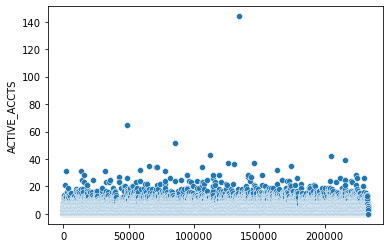

In [36]:
sns.scatterplot(data=train['ACTIVE_ACCTS'])

<AxesSubplot:ylabel='NO_OF_ACCTS'>

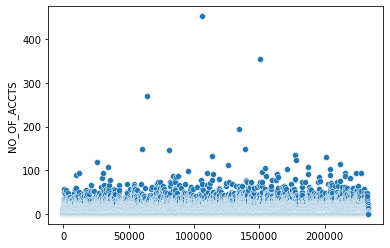

In [37]:
sns.scatterplot(data=train['NO_OF_ACCTS'])

<AxesSubplot:ylabel='OVERDUE_ACCTS'>

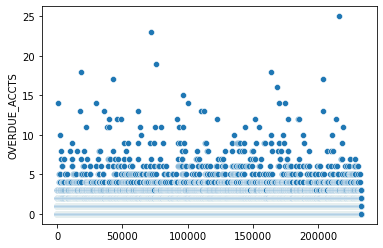

In [38]:
sns.scatterplot(data=train['OVERDUE_ACCTS'])

<AxesSubplot:ylabel='CURRENT_BALANCE'>

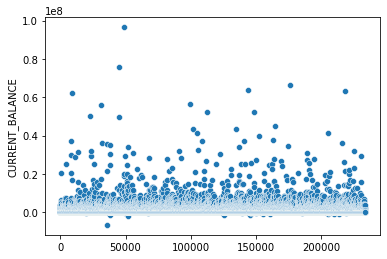

In [39]:
sns.scatterplot(data = train['CURRENT_BALANCE'])

In [40]:
def mode_impute_outlier(data):
    li = list(data['ACTIVE_ACCTS'].sort_values()[-3:].index)
    data['ACTIVE_ACCTS'][li] = int(data.drop(li)['ACTIVE_ACCTS'].mode())
    li = list(data['NO_OF_ACCTS'].sort_values()[-4:].index)
    data['NO_OF_ACCTS'][li] = int(data.drop(li)['NO_OF_ACCTS'].mode())
    li = list(data['OVERDUE_ACCTS'].sort_values()[-10:].index)
    data['OVERDUE_ACCTS'][li] = int(data.drop(li)['OVERDUE_ACCTS'].mode())
    li = list(data['CURRENT_BALANCE'].sort_values()[-15:].index)
    data['CURRENT_BALANCE'][li] = int(data.drop(li)['CURRENT_BALANCE'].mode())

In [41]:
mode_impute_outlier(train)

In [42]:
train.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default,CNS_SCORE_DESCRIPTION,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,DISBURSED_AMOUNT,INSTAL_AMT
0,50578,58400,89.55000,01-01-84,1,03-08-18,1,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,0,0,0
1,47145,65550,73.23000,31-07-85,0,26-09-18,1,0,0,0,0,598,2,0,1,23,23,1,2,1,1,1,27600,50200,50200,1991
2,53278,61360,89.63000,24-08-85,0,01-08-18,1,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,0,0,0
3,57513,66113,88.48000,30-12-93,0,26-10-18,1,0,0,0,0,305,0,0,0,8,15,1,7,3,0,0,0,0,0,31
4,52378,60300,88.39000,09-12-77,0,26-09-18,1,0,0,0,0,0,-1,0,0,0,0,1,-1,0,0,0,0,0,0,0


# Lets take a look at Date of Birth Column

In [43]:
train.Date_of_Birth.min(), train.Date_of_Birth.max()

('01-01-00', '31-12-99')

In [44]:
df_age = train[['disbursed_amount', 'asset_cost', 'ltv', 'Date_of_Birth','DisbursalDate','loan_default']]
df_age.tail()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,DisbursalDate,loan_default
233149,63213,105405,60.72000,01-08-88,26-10-18,0
233150,73651,100600,74.95000,05-12-88,23-10-18,0
233151,33484,71212,48.45000,01-06-76,24-10-18,0
233152,34259,73286,49.10000,26-03-94,29-09-18,0
233153,75751,116009,66.81000,18-02-84,27-10-18,0


Date_of_Birth = Date of birth of the customer	

Disbursal_Date = Date of disbursement

Disbursement means the payment of money from a fund.

In [45]:
def age(dob):
    yr = int(dob[-2:])
    if yr >=0 and yr < 20:
        return yr + 2000
    else:
         return yr + 1900
        
df_age['Date_of_Birth'] = df_age['Date_of_Birth'].apply(age)
df_age['DisbursalDate'] = df_age['DisbursalDate'].apply(age)
df_age['Age']=df_age['DisbursalDate']-df_age['Date_of_Birth']
df_age=df_age.drop(['DisbursalDate','Date_of_Birth'],axis=1)

df_age.head()

,disbursed_amount,asset_cost,ltv,loan_default,Age
0,50578,58400,89.55000,0,34
1,47145,65550,73.23000,1,33
2,53278,61360,89.63000,0,33
3,57513,66113,88.48000,1,25
4,52378,60300,88.39000,1,41


In [46]:
def calculate_age(data):
    data['Date_of_Birth'] = data['Date_of_Birth'].apply(age)
    data['DisbursalDate'] = data['DisbursalDate'].apply(age)
    # Age of applicant when he/she applied for Loan
    data['Age'] = data['DisbursalDate'] - data['Date_of_Birth']
    data = data.drop( ['DisbursalDate', 'Date_of_Birth'], axis=1)
    
calculate_age(train)

In [47]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.00000,54356.99353,12971.31417,13320.00000,47145.00000,53803.00000,60413.00000,990572.00000
asset_cost,233154.00000,75865.06814,18944.78129,37000.00000,65717.00000,70946.00000,79201.75000,1628992.00000
ltv,233154.00000,74.74653,11.45664,10.03000,68.88000,76.80000,83.67000,95.00000
Date_of_Birth,233154.00000,1983.89905,9.80599,1949.00000,1977.00000,1986.00000,1992.00000,2000.00000
Employment_Type,233154.00000,0.45257,0.49775,0.00000,0.00000,0.00000,1.00000,1.00000
DisbursalDate,233154.00000,2018.00000,0.00000,2018.00000,2018.00000,2018.00000,2018.00000,2018.00000
Aadhar_flag,233154.00000,0.84032,0.36631,0.00000,1.00000,1.00000,1.00000,1.00000
PAN_flag,233154.00000,0.07558,0.26432,0.00000,0.00000,0.00000,0.00000,1.00000
VoterID_flag,233154.00000,0.14494,0.35204,0.00000,0.00000,0.00000,0.00000,1.00000
Driving_flag,233154.00000,0.02324,0.15067,0.00000,0.00000,0.00000,0.00000,1.00000


In [48]:
transformed = []
transformed_with_one = []
not_transformed = []

def column_to_transform(data):

    num_col = ['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS_SCORE',
            'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH',
           'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
           'NO_OF_ACCTS', 'ACTIVE_ACCTS', 'OVERDUE_ACCTS', 'CURRENT_BALANCE',
           'SANCTIONED_AMOUNT', 'DISBURSED_AMOUNT', 'INSTAL_AMT', 'Age']
    
    num_col_data = data[num_col]
    
    def transformation_boxcox(num_col_data):
    
        from scipy.stats import boxcox

        for i in num_col:
            if num_col_data[i].min() > 0:
                num_col_data[i] = boxcox(num_col_data[i])[0]
                transformed.append(i)
            elif num_col_data[i].min() == 0:
                num_col_data[i] = boxcox(num_col_data[i]+1)[0]
                transformed_with_one.append(i)
            else:
                num_col_data[i] = num_col_data[i]
                not_transformed.append(i)
        print("Successful")
    
    transformation_boxcox(data)

column_to_transform(train)

Successful


In [49]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.00000,106.18882,8.34112,66.13230,101.80791,106.46599,110.72198,282.53401
asset_cost,233154.00000,0.76494,0.00000,0.76494,0.76494,0.76494,0.76494,0.76495
ltv,233154.00000,397966.90003,162435.83557,545.38795,282697.92402,402392.75142,531308.39694,802146.75096
Date_of_Birth,233154.00000,1983.89905,9.80599,1949.00000,1977.00000,1986.00000,1992.00000,2000.00000
Employment_Type,233154.00000,0.45257,0.49775,0.00000,0.00000,0.00000,1.00000,1.00000
DisbursalDate,233154.00000,2018.00000,0.00000,2018.00000,2018.00000,2018.00000,2018.00000,2018.00000
Aadhar_flag,233154.00000,0.84032,0.36631,0.00000,1.00000,1.00000,1.00000,1.00000
PAN_flag,233154.00000,0.07558,0.26432,0.00000,0.00000,0.00000,0.00000,1.00000
VoterID_flag,233154.00000,0.14494,0.35204,0.00000,0.00000,0.00000,0.00000,1.00000
Driving_flag,233154.00000,0.02324,0.15067,0.00000,0.00000,0.00000,0.00000,1.00000


In [50]:
def data_processing(data):
    test.columns = test.columns.str.replace('.','_')
    columns_drop(data)
    months_transformation(data)
    transform_CNS_Description(data)
    transform_PERFORM_CNS_SCORE_DESCRIPTION(data)
    fill_employment_type(data)
    new_col(data)
    mode_impute_outlier(data)
    calculate_age(data)
    column_to_transform(data)
    preprocessing.RobustScaler()
    scaler.transform(data)
    return data.shape

In [51]:
X = train.drop(['loan_default'], axis=1)
y = train['loan_default']

In [52]:
X.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,CNS_SCORE_DESCRIPTION,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,DISBURSED_AMOUNT,INSTAL_AMT,Age
0,104.26117,0.76494,662254.26844,1984,1,2018,1,0,0,0,0,0.00000,-1,0.00000,0.00000,0.00000,0.00000,-1,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,2.23053
1,101.80791,0.76494,344821.24284,1985,0,2018,1,0,0,0,0,5.26245,2,0.00000,0.06112,2.06063,2.19300,2,0.54343,0.46091,0.09710,27600,6.63106,6.59978,3.34517,2.21949
2,106.11323,0.76494,664175.30815,1985,0,2018,1,0,0,0,0,0.00000,-1,0.00000,0.00000,0.00000,0.00000,-1,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,2.21949
3,108.89531,0.76494,636928.47801,1993,0,2018,1,0,0,0,0,4.80413,0,0.00000,0.00000,1.61596,2.00017,7,0.87036,0.00000,0.00000,0,0.00000,0.00000,2.29674,2.11216
4,105.50302,0.76494,634829.32372,1977,0,2018,1,0,0,0,0,0.00000,-1,0.00000,0.00000,0.00000,0.00000,-1,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,2.29772


# Balance Data using SMOTE

SMOTE is python library which is used when the data is imbalanced.

In [53]:
smote = SMOTE()
X_tf,y_tf = smote.fit_resample(X,y)
X_tf.shape, y_tf.shape

((365086, 26), (365086,))

# Transforming Data

In [54]:
scaler = preprocessing.RobustScaler()
X_tf = scaler.fit_transform(X_tf)

# Split the data into training and testing sets 
x_train,x_test,y_train,y_test = train_test_split(X_tf,y_tf,test_size = .1, random_state = 3300)

print(x_train.shape[0], x_test.shape[0])

328577 36509


# Traning Our Model

In [55]:
accuracy = {}
roc_r = {}

def train_model(model, model_name):
    print(model_name)
    
    # Fitting model
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    #Model accuracy
    acc = accuracy_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('accuracy_score',acc)
    print('precision_score',precision_score(y_test, pred)*100)
    print('recall_score',recall_score(y_test, pred)*100)
    print('f1_score',f1_score(y_test, pred)*100)
    
    
    #ROC Score
    roc_score = roc_auc_score(y_test, pred)*100
    roc_r[model_name] = roc_score
    print('roc_auc_score',roc_score)
    
    # Confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    
    #ROC Score
    fpr, tpr, threshold = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)*100
    
    #ROC Plot
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

XGBClassifier
[20:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 84.41754088033088
precision_score 94.18792606648394
recall_score 73.37932544897066
f1_score 82.49161357830917
roc_auc_score 84.42328837534858
confusion_matrix
       0      1
0  17418    827
1   4862  13402


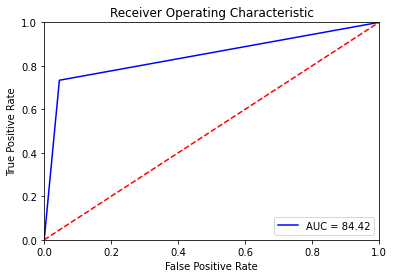

In [56]:
xgb = XGBClassifier(n_estimators = 1500, nthread  = 4, max_depth = 15, min_child_weight = 5, learning_rate=0.1)

train_model(xgb, 'XGBClassifier')

In [57]:
'''from sklearn.ensemble import StackingClassifier

estimator = [('Lgbr', lgbm), ('xgb', xgb), ('gbc', gbc), ('mlp', mlp)]

sc = StackingClassifier(estimators = estimator, final_estimator = lgbm, n_jobs=-1)

train_model(sc, 'StackingClassifier')'''

"from sklearn.ensemble import StackingClassifier\n\nestimator = [('Lgbr', lgbm), ('xgb', xgb), ('gbc', gbc), ('mlp', mlp)]\n\nsc = StackingClassifier(estimators = estimator, final_estimator = lgbm, n_jobs=-1)\n\ntrain_model(sc, 'StackingClassifier')"

In [58]:
# Predicted values

y_head_xgb = xgb.predict(x_test)


In [59]:
cm_xgb = confusion_matrix(y_test,y_head_xgb)


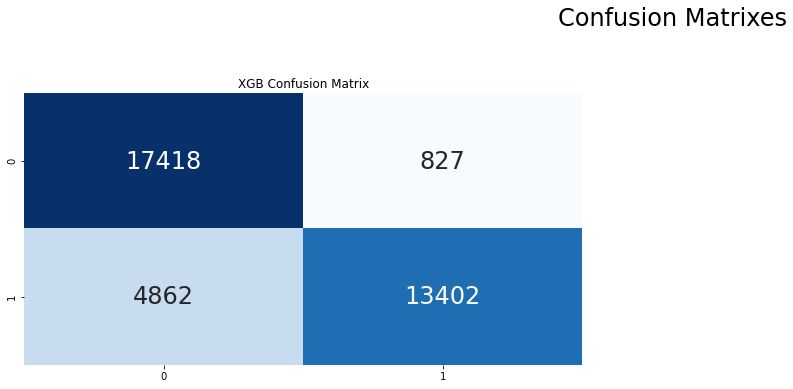

In [60]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("XGB Confusion Matrix")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

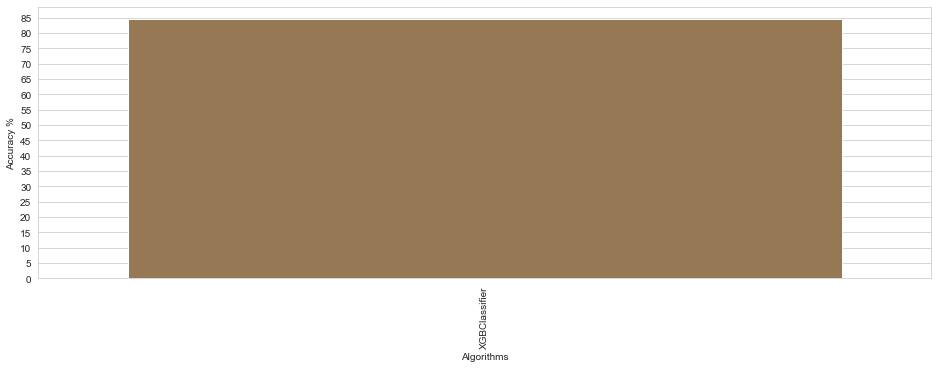

In [61]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette="cubehelix")
plt.show()

# Now train it with whole Traning dataset

# Now we will predict on Test Data

In [62]:
submission = pd.DataFrame()
submission['UniqueID'] = test['UniqueID']

In [63]:
test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54000,67,22807,45,1497,01-01-74,Salaried,03-11-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45000,67,22807,45,1497,20-05-85,Self employed,20-11-18,6,1998,1,1,0,0,0,0,749,C-Very Low Risk,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93000,78,23135,86,2071,14-10-95,Salaried,29-11-18,4,1646,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58000,78,17014,45,2070,01-06-73,Self employed,29-11-18,4,1646,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08000,78,17014,45,2069,01-06-72,Salaried,17-11-18,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [64]:
data_processing(test)
test.head()

Successful


,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,CNS_SCORE_DESCRIPTION,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,DISBURSED_AMOUNT,INSTAL_AMT,Age
0,93.91124,0.64651,2742648.36107,1974,1,2018,1,0,0,0,0,0.00000,-1,0.00000,0.00000,0.00000,0.00000,-1,0.00000,0.00000,0.00000,0,0,0.00000,0.00000,2.67799
1,95.05604,0.64651,3090584.19124,1985,0,2018,1,0,0,0,0,5.17963,4,0.18035,0.00000,1.60325,1.85896,12,0.73304,0.43734,0.00000,43898,48780,5.95010,3.31712,2.53633
2,100.18338,0.64651,2058521.55586,1995,1,2018,1,1,0,0,0,0.00000,-1,0.00000,0.00000,0.00000,0.00000,-1,0.00000,0.00000,0.00000,0,0,0.00000,0.00000,2.34695
3,89.99585,0.64651,1763622.59213,1973,0,2018,1,0,0,0,0,2.44298,-1,0.00000,0.00000,2.12067,2.23783,-1,0.53308,0.43734,0.09246,132480,255000,6.34224,0.00000,2.68872
4,92.72737,0.64651,2690365.86594,1972,1,2018,1,0,0,0,0,0.00000,-1,0.00000,0.00000,0.00000,0.00000,-1,0.00000,0.00000,0.00000,0,0,0.00000,0.00000,2.69918


In [65]:
submission.head()

,UniqueID
0,655269
1,723482
2,758529
3,763449
4,708663
